In [1]:
using Plots, Random, DataFrames, LinearAlgebra, Printf, JLD, Distributions, Combinatorics, MLJ, Graphs, Gurobi, JuMP, Statistics, Clustering, Distances
const GRB_ENV = Gurobi.Env()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


Gurobi.Env(Ptr{Nothing} @0x00000001507d0400, false, 0)

In [4]:
include("../src/utils.jl");
include("../src/opt.jl");

In [5]:
points = generate_points(2, 20, 2, 1.0);

@time results = column_generation(points, 2, 2);

              | Objective | Lower bound | MP time (s) | SP time (s) | Reduced cost
Iteration   1 |     2.912 |      -8.428 |       2.993 |       0.000 |       -0.567


Iteration   2 |     2.345 |      -0.367 |       0.001 |       0.000 |       -0.136
Iteration   3 |     2.210 |       2.210 |       0.000 |       0.000 |        0.000


  3.378108 seconds (7.72 M allocations: 422.763 MiB, 1.68% gc time, 99.80% compilation time: 1% of which was recompilation)


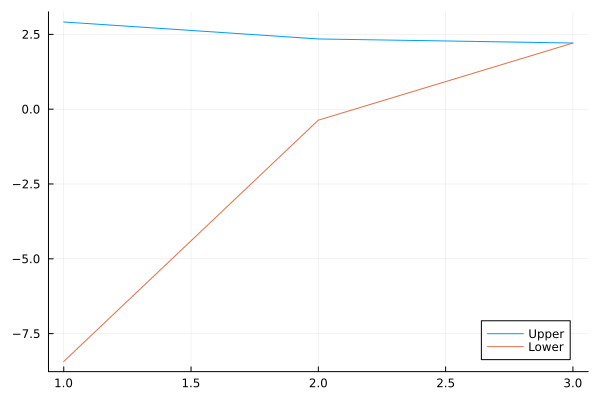

In [6]:
plot(
    1:length(results["upper_bounds"]),
    [
        results["upper_bounds"],
        results["lower_bounds"],
    ],
    legend = :bottomright,
    label = [
        "Upper" "Lower"
    ]
)

In [6]:
results["CGLP_objective"]

2.209767281640288

In [92]:
results["CGIP_objective"]

2.209767281640288

In [93]:
findall(x->x>=0.1,results["CGIP_solution"])

2-element Vector{Int64}:
 4
 6

In [94]:
results["clusters"]

6-element Vector{Cluster}:
 Cluster([2, 6, 7, 9, 10, 12, 14, 16, 19, 20], [0.19380385558582247, 0.12817901700872097], 1.7647055951331052)
 Cluster([1, 3, 4, 5, 8, 11, 13, 15, 17, 18], [0.8004195714763533, 0.888754029034222], 1.2404970843327512)
 Cluster([1, 3, 4, 5, 8, 11, 12, 13, 15, 17, 18], [0.7563430664856532, 0.8647977340702706], 1.8075416923421077)
 Cluster([2, 6, 7, 9, 10, 14, 16, 19, 20], [0.18027339325328595, 0.07295059840627241], 1.104883640820144)
 Cluster([1, 3, 4, 5, 8, 11, 13, 15, 17, 18], [0.8004195714763533, 0.888754029034222], 1.2404970843327512)
 Cluster([2, 6, 7, 9, 10, 14, 16, 19, 20], [0.18027339325328595, 0.07295059840627241], 1.104883640820144)

In [96]:
points = generate_points(2, 30, 2, 1.0)

30×2 Matrix{Float64}:
 0.0456656  0.204322
 0.136156   0.0482153
 0.261297   0.130407
 0.744175   0.928949
 0.428706   0.199755
 0.682453   0.861775
 0.0        0.226949
 0.669085   0.953186
 0.563107   0.944327
 0.644745   0.986188
 ⋮          
 0.0359376  0.0911983
 0.930084   0.870475
 0.194442   0.169351
 0.0566517  0.146153
 0.812399   1.0
 0.0905108  0.0
 0.59966    0.962612
 0.013108   0.0383666
 0.149353   0.0567723

In [97]:
km_results = []
cg_results = []
for i = 20:130
    points = generate_points(2, i, 2, 1.0)
    km =  kmeans(points', 2).assignments
    clusters = Cluster[]
    for k in 1:2
        assinments = findall(x->x==k, km); 
        cost, centroid = compute_cluster_centroid_cost(assinments)
        push!(clusters, Cluster(assinments, centroid, cost))
    end
    push!(km_results, sum([c.cost for c in clusters]))

    results = column_generation(points, 2, 20, 10, false)
    push!(cg_results, results["CGIP_objective"])
end


In [98]:
results["clusters"][findall(x->x==1, results["CGIP_solution"])]

2-element Vector{Cluster}:
 Cluster([1, 2, 5, 15, 17, 19, 20, 21, 22, 24  …  109, 114, 117, 118, 124, 125, 126, 127, 129, 130], [0.6901918728201338, 0.8860492420984627], 6.6785061269499435)
 Cluster([1, 2, 5, 15, 17, 19, 20, 21, 22, 24  …  109, 114, 117, 118, 124, 125, 126, 127, 129, 130], [0.6901918728201338, 0.8860492420984627], 6.6785061269499435)

In [99]:
cg_results[end]

13.357012253899887

In [100]:
km_results[end]

13.938070683890857

In [101]:
points[78,1]

0.3042542990585993

In [102]:
[points[78,2]]

1-element Vector{Float64}:
 0.5966715977536948

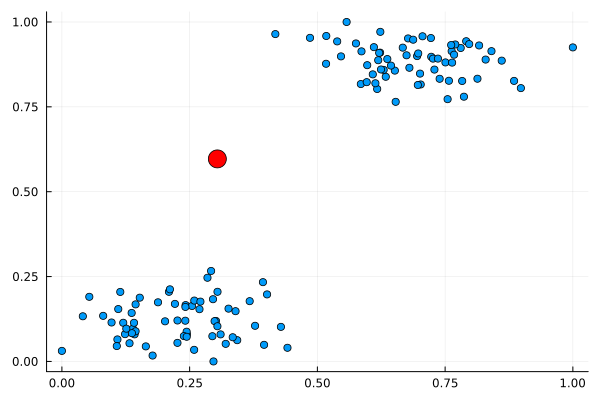

In [103]:
plot(points[:,1], points[:,2], seriestype=:scatter, legend=false)
scatter!([points[78,1]], [points[78,2]], color=:red, markersize=10)

In [105]:
mean(km_results)

8.383042977429199

In [106]:
mean(cg_results)

7.876320095737413